# O Dataset e o Projeto: Housing California
<hr>
<p> Thomas Bekhor, João Bresser, Marcos Paulo Ricarte</p>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O dataset é o conjunto de dados de imóveis da Califórnia, que contém dados extraídos do censo de 1990 dos EUA. Os dados foram divididos em blocos que, em média, possuem aproximidamente 1.425,5 indivíduos, cada um, que vivem em uma área compactada. A latitude e longitude significam o centróide de cada área do bloco. Os dados finais contêm 20.640 observações sobre nove características. </p>


### Features do Dataset:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>longitude (ponto flutuante 64)</b> - Uma medida do oeste de uma casa. Um valor mais negativo está mais a oeste. </li>
    <li><b>latitude (ponto flutuante 64)</b> - Uma medida do norte mais alto de uma casa; um valor maior é mais ao norte. </li>
    <li><b>housing_median_age (ponto flutuante 64)</b> - Idade mediana de uma casa em um bloco; residências novas que ainda não têm moradores, diminuem o valor dessa variável. </li>
    <li><b>total_rooms (ponto flutuante 64)</b> - Número total de salas em um bloco. </li>
    <li><b>total_bedrooms (ponto flutuante 64)</b> - Número total de quartos em um bloco. </li>
    <li><b>population (ponto flutuante 64)</b> - Número total de pessoas que residem em um bloco. </li>
    <li><b>households (ponto flutuante 64)</b> - Número total de unidade residencial para cada bloco. </li>
    <li><b>median_income (ponto flutuante 64)</b> - Renda mediana para famílias em um bloco de casa, medido em dezenas de milhares de dólares americanos. </li>
    <li><b>median_house_value (ponto flutuante 64)</b> - Valor mediano da casa para casas em um bloco, medido em dólares.</li>
    <li><b>ocean_proximity (object)</b> - Proximidade do oceano. </li>
</ul>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset. Através de uma exploração das correlações, e verificação de outliers, adaptação das variáveis, no final do projeto teremos um modelo de regressão acurado para o valor mediano de uma casa (target) na região segundo os inputs de um conjunto de variáveis.</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

# Perguntas pro chico:
- fazer exploracao das features?
- capped values - boxplot. regressao pode passar desses valores?
- quais modelos sklearn posso usar? Tem que justificar? Linear Regression jaá normaliza com Standard Scaler? 
- os modelos estao bons? Como saber se esta bom(boxplot)
- pra que serve o cross validation ?
- probelma array com Fregression e Mutual information.
- pra qual modelo vou fazer o feature selection e o tuning de hiperparametros?
- depois de otimizar, o que se faz, roda denovo?


# <font color='red' style='font-size: 30px;'>Importando bibliotecas</font>
<hr style='border: 2px solid red;'>

In [1]:
#bibliotecas matemáticas e gráficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#separação entre treino e teste
from sklearn.model_selection import train_test_split

#separação estratificada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#modelagem
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

#resultados da modelagem
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#fazer o cross validation
from sklearn.model_selection import cross_val_score

#encontrando os melhores features
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

#serializar modelo
import joblib

#tuning de hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# <font color='red' style='font-size: 30px;'>Primeiro encontro com o DataSet</font>
<hr style='border: 2px solid red;'>

Lendo a base de dados

In [2]:
df_house = pd.read_csv("DATA1_housing.csv")

Entendendo como é o DataFrame

In [3]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Vendo as informações do nosso DataFrame

In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Explorando mais um pouco cada feature numérico. O eixo vertical representa o numero de aparições e o eixo horizontal representa o número do range de valores escolhidos (no caso seria o BINS, que é calculado a partir da quantidade de linhas do DataFrame). 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

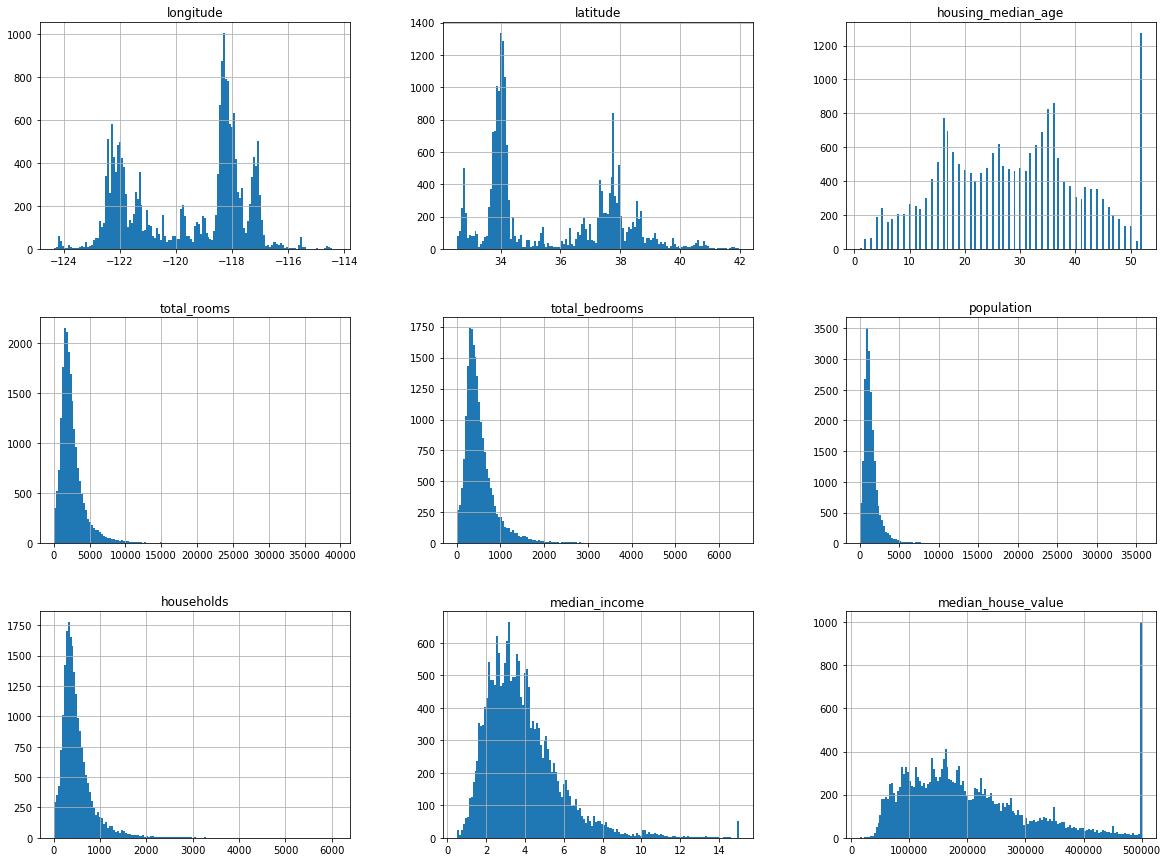

In [6]:
%matplotlib inline
BINS= int(np.sqrt(len(df_house.index)))
df_house.hist(bins=BINS, figsize=(20, 15))

Vamos avaliar a correlação entre todas variáveis.

In [7]:
corr=df_house.corr()
corr.style.background_gradient(cmap='coolwarm')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Pode se ver que as variáveis com mais correlação entre si são:
- total_rooms
- total_bedrooms
- population
- households.

Essas variáveis por estarem muito correlacionadas podem influenciar no modelo, portanto é importante fazer uma análise profunda delas.

Além disso, as variaveis que tem mais correlação com nossa variável target são:
- median_income
- latitude
- total_rooms
- house_median_age

Vamos visualizar melhor essas correlações entre todas variáveis.

KeyboardInterrupt: 

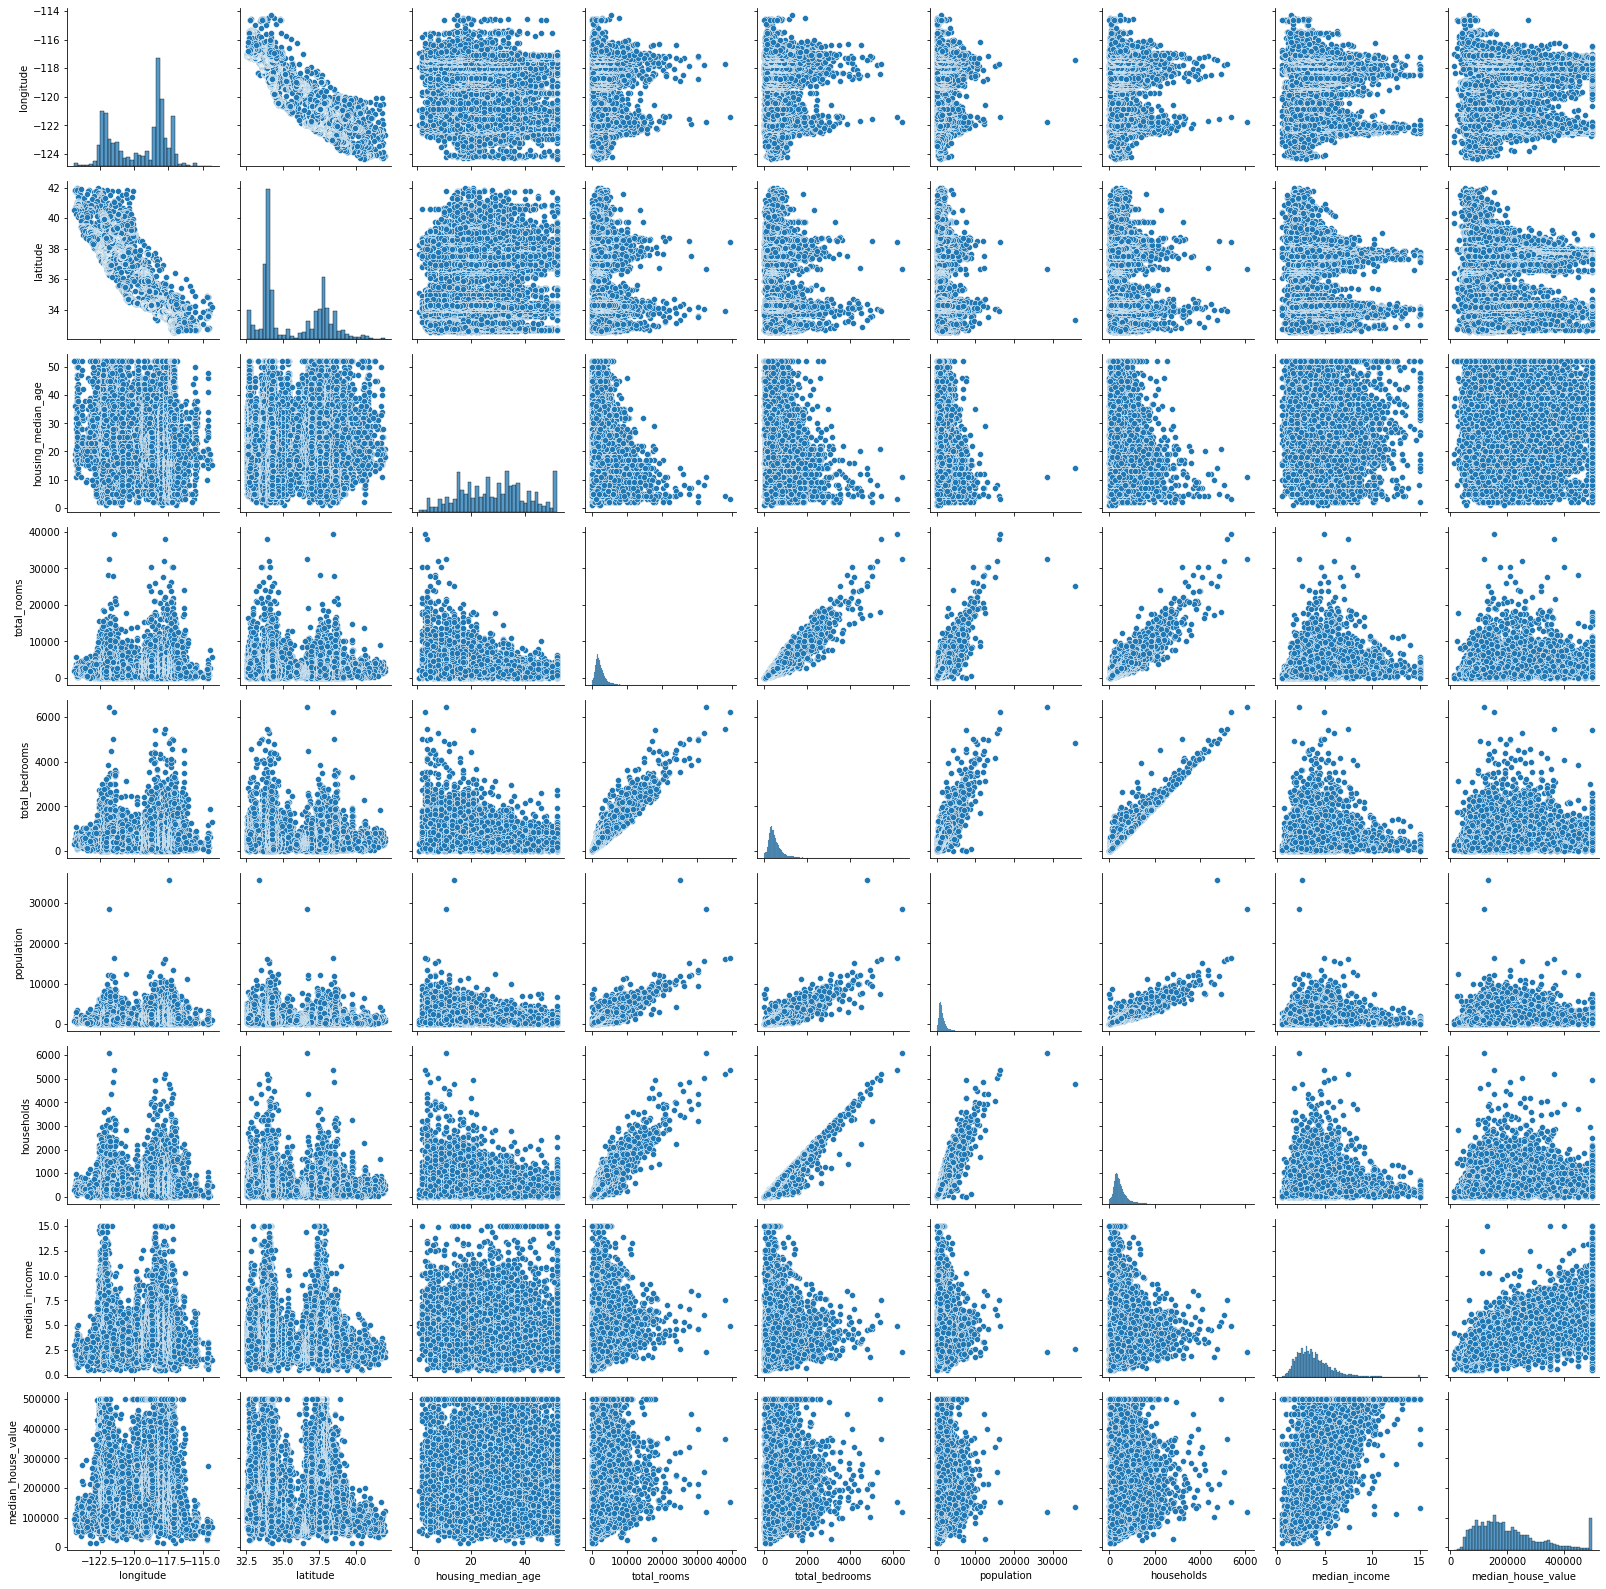

In [8]:
ax=sns.pairplot(df_house)

# <font color='red' style='font-size: 30px;'>Entendendo as variáveis</font>
<hr style='border: 2px solid red;'>

Agora pensando mais especificamente na nossa variável target, é possivel fazer uma analise genérica, que pode ajudar na melhora do nosso modelo, e assim relacionar uma linha de raciocínio com as features que temos disponíveis no nosso DataFrame. 

Assim, quais os principais fatores que podem influenciar no preço de uma casa?
- Localização: bem representado pela combinação da latitude e longititude, e a categoria "ocean_proximity", pois relaciona tanto a proximidade de cidades, quanto  tipo de casa.
- Tamanho: pode ser representado pela relação entre a quantidade de cômodos ("total_rooms") e a quantidade de casas de cada bloco ("households")

Agora quais sao os razões que influenciam na ponderação desses dois tópicos acima? Ou seja, o que faz o dono da casa querer uma certa localização, uma casa maior ou menor, de uma forma geral? 

- Estilo de vida. O morador prefere um lugar mais silencioso? Mais familiar? Mais agitado? Afastado ou central? Esse fator pode ser representado, de uma forma geral, pela idade dos moradores ("housing_median_age"). Além disso, o estilo de vida também se relaciona a quantos quartos existem em proporção com a quantidade de ambientes da casa. Pessoas mais jovens, por exemplo, tendem e morar em lugares mais centrais, e agitados, e com mais quartos por ambiente. Pesosas mais adultas e idosas, tendem a morar em lugares mais afastados e sossegados, com menos pessoas na casa, portanto com o ratio quarto/cômodo maior. Será que isso se comprova neste DataFrame?
- Quantidade de pessoas em uma casa: pode ser explicada pela relação entre a quantidade total de pessoas por bloco ("population") e o número total de casas ("households").

Por fim, e o principal, o que define se ela morará lá ou não?
- O quanto ela pode a pagar: definido pela feature "median_income"

Portanto vamos reestruturar nosso Dataframe, de modo que ele represente essa linha de raciocínio da melhor forma.

In [10]:
#criando uma coluna de quartos por casa 
df_house["rooms_per_household"] = df_house["total_rooms"]/df_house["households"]
#agora criando uma coluna de pessoas por casa
df_house["population_per_household"] = df_house["population"]/df_house["households"]
#agora criando uma coluna de ambiente quartos por ambiente
df_house["bedrooms_per_rooms"] = df_house["total_bedrooms"]/df_house["total_rooms"]
#agora apagando as colunas de "total_rooms", "total bedrooms", "households" e "population", já que seus valores estão relacionados com as novas colunas.
df_house=df_house.drop(["population", "households" ,"total_rooms", "total_bedrooms"], axis=1)

df_house.head()



,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_rooms
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096


Vamos rever as correlações.

In [11]:
corr=df_house.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_rooms
longitude,1.000000,-0.924664,-0.108197,-0.015176,-0.045967,-0.027540,0.002476,0.092657
latitude,-0.924664,1.000000,0.011173,-0.079809,-0.144160,0.106389,0.002366,-0.113815
housing_median_age,-0.108197,0.011173,1.000000,-0.119034,0.105623,-0.153277,0.013191,0.136089
median_income,-0.015176,-0.079809,-0.119034,1.000000,0.688075,0.326895,0.018766,-0.615661
median_house_value,-0.045967,-0.144160,0.105623,0.688075,1.000000,0.151948,-0.023737,-0.255880
rooms_per_household,-0.027540,0.106389,-0.153277,0.326895,0.151948,1.000000,-0.004852,-0.416952
population_per_household,0.002476,0.002366,0.013191,0.018766,-0.023737,-0.004852,1.000000,0.002938
bedrooms_per_rooms,0.092657,-0.113815,0.136089,-0.615661,-0.255880,-0.416952,0.002938,1.000000


É possivel ver que as as novas variáveis, tem uma correlacao melhor quando combinadas pelas variáveis que foram excluídas. Agora as mais correlacionadas com target são:
- latitude
- house median age
- median income
- rooms per household
- bedrooms per room

Agora com o nosso DataFrame mais adaptado com a realidade, vamos rever os histogramas.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'rooms_per_household'}>],
       [<AxesSubplot:title={'center':'population_per_household'}>,
        <AxesSubplot:title={'center':'bedrooms_per_rooms'}>,
        <AxesSubplot:>]], dtype=object)

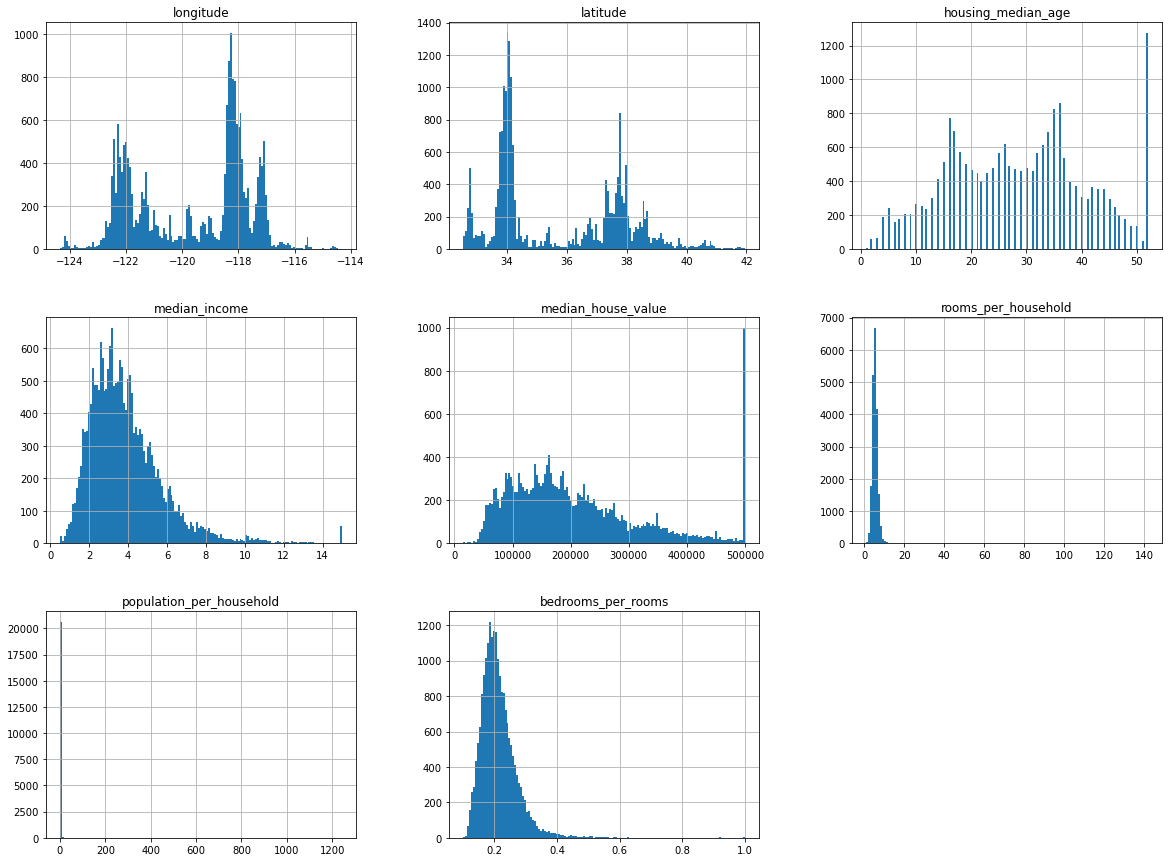

In [12]:
%matplotlib inline
BINS= int(np.sqrt(len(df_house.index)))
df_house.hist(bins=BINS, figsize=(20, 15))

A variável target assim como as features de "median_income" e "housing_median_age" tem valores discrepantes em suas caudas, nos gráficos acima. Isso acontece pois há um limite na escala pelo Dataframe, ou seja, antes de serem computados, se os valores passam o limite estabelecido pela escala, eles sao computados como o valor máximo da coluna. Por isso que existem muitos valores com "house_median_age" de 52, "median_income" de 
$1.500.010 dólares e "house_median_value" de 500001 dólares. Esses valores, considerados outliers dentro dos gráficos serão mantidos, porém é necessário se atentar que na regressão, valores que se aproximem ou passem do máximo da variável target, não tem valor real.???????

# <font color='red' style='font-size: 30px;'>Explorando as features</font>
<hr style='border: 2px solid red;'>

Agora vamos explorar um pouco mais as features do nosso modelo.

## LATITUDE E LONGITUDE

Quanto maior o círculo mais população no bloco e as cores significam os preços. É possivel comparar com o mapa da California, onde os pontos mais vermelhos do plot se situam perto das cidades de São Francisco, Los Angeles e San Diego.

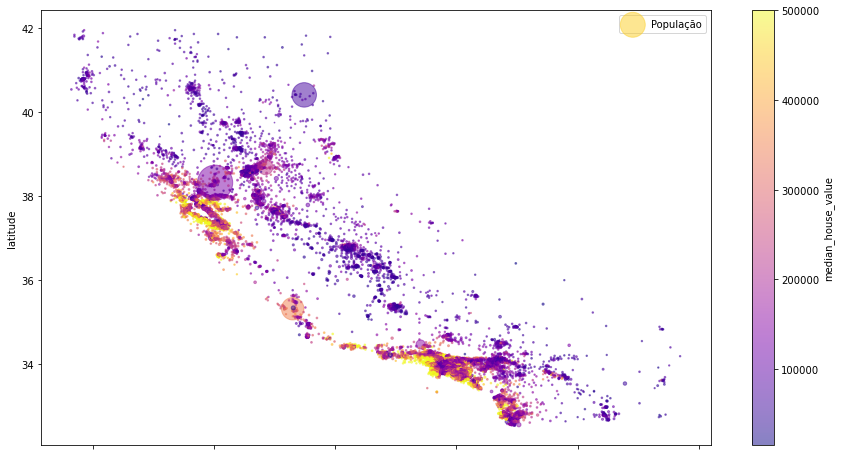

In [11]:
df_house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=df_house["population_per_household"], label="População por casa ", figsize=(15,8),
    c="median_house_value",cmap=plt.get_cmap("plasma"), colorbar=True,
    sharex=True)
plt.legend()

/Users/tbekhor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


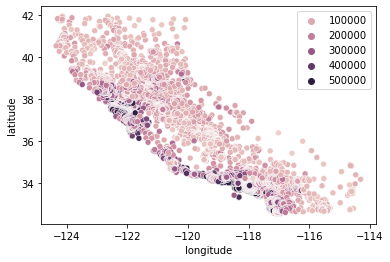

In [12]:
sns.scatterplot('longitude', 'latitude', data=df_house, hue='median_house_value')

plt.legend()

![SNOWFALL](calimap.jpeg "Mapa da California")


## MEDIAN INCOME


## ROOMS PER HOUSEHOLD


## POPULATION PER HOUSEHOLD


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

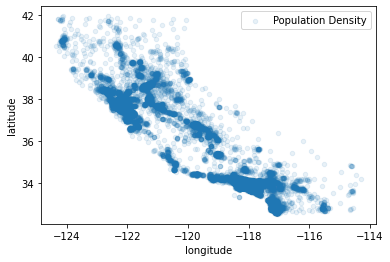

In [13]:
df_house.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.1, label="Population Density")

## BEDROOMS PER ROOM

## HOUSING MEDIAN AGE

Vamos ver onde vivem as pessoas com cada idade.

In [17]:
#dividir entre jovens, jovens adultos e adultos
subset=df_house 

for i in df_house["housing_median_age"]:
    if i<19:
        subset["age_range"]= "JOVEM"
    if i>20 and i<40:
        subset["age_range"]= "JOVEM ADULTO"
    if i>40:
        subset["age_range"]= "ADULTO"
subset

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_rooms,age_range
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591,JOVEM
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797,JOVEM
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516,JOVEM
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458,JOVEM
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096,JOVEM
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625,JOVEM
20636,-121.21,39.49,18.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208,JOVEM
20637,-121.22,39.43,17.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173,JOVEM
20638,-121.32,39.43,18.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892,JOVEM


In [ ]:
df_house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.9,
    figsize=(15,8),
    c="housing_median_age",cmap=plt.get_cmap("plasma"), colorbar=True,
    sharex=True)
plt.legend()
#dividir entre jovens, jovens adultos e adultos

##	MEDIAN INCOME

In [1]:
# distribuição normal da feature
BINS = int(np.sqrt(len(df_house.index)))
df_house["median_income"].apply(np.log10).plot.hist(bins = BINS)

NameError: name 'np' is not defined

Vamos visualizar sua relação com a varável target ja que existe uma alta correlação.

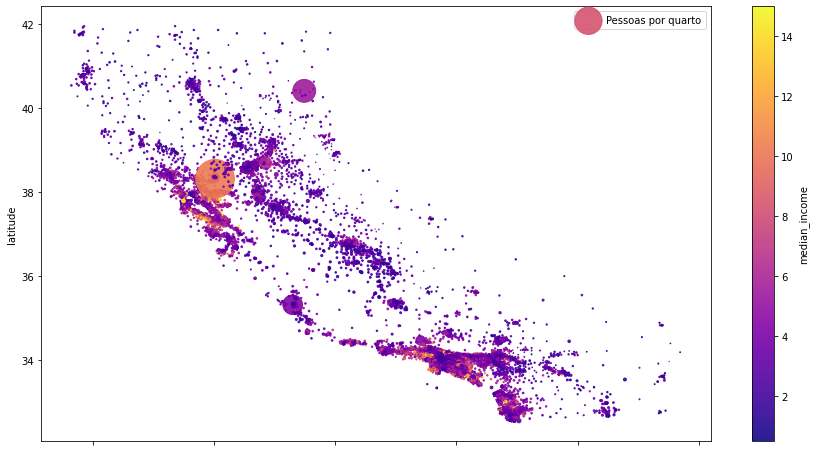

In [126]:
df_house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.9,
    s=df_house["population"]/df_house["total_bedrooms"], label="Pessoas por quarto", figsize=(15,8),
    c="median_income",cmap=plt.get_cmap("plasma"), colorbar=True,
    sharex=True)
plt.legend()

## OCEAN PROXIMITY

/Users/tbekhor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


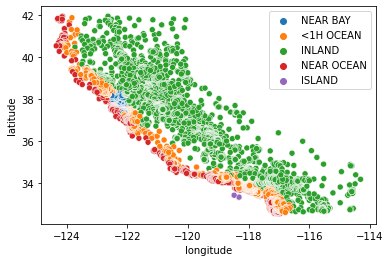

In [171]:
#vamos verificar onde se encontra cada categoria
sns.scatterplot('longitude', 'latitude', data=df_house, hue='ocean_proximity')

plt.legend()

In [18]:
df_house['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

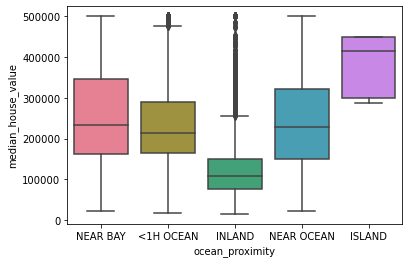

In [20]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df_house, palette="husl")


# <font color='red' style='font-size: 30px;'>Treino e Teste</font>
<hr style='border: 2px solid red;'>

Separando o DataFrame entre treino e teste. Sendo X as variáveis explicativas e Y a variável target.

In [174]:
y = df_house.loc[:,"median_house_value"]
X = df_house.drop(["median_house_value"], axis=1)


In [175]:
RAND_SEED=42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,                  
    test_size=0.2,
    random_state=RAND_SEED,
)

Verificando a separação do treino e teste.

In [176]:
X_train.shape[0] + X_test.shape[0]

20640

Separando o X_train entre um DataFrame categórico e um numérico.

In [177]:
X_train_num = X_train.drop(["ocean_proximity"], axis=1)
X_train_cat = X_train.loc[:,"ocean_proximity"]

Será necessario verificar se há valores NaN no DataFrame:

In [178]:
df_house.isnull().sum()


longitude                     0
latitude                      0
housing_median_age            0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
population_per_household      0
bedrooms_per_rooms          207
dtype: int64

Assim os valores NaN serão subsituidos pela mediana (pois representa uma parcela pequena dos dados, então nao influenciará na modelagem) da sua feature. Outra mudança necessária é padronizar a escala das features, pois cada um tem um range diferente. Além disso, a variavel categórica será transformada numa matriz de 5 elementos binários, demonstrando se existe tal característica da ocean_proximity, 1,  ou não, 0.

In [179]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler() #padroniza a escala

num_pipeline = Pipeline([
    ('imputer', imputer),
    ('std_scaler', scaler),
])

one_hot_encoder = OneHotEncoder(sparse=False) #coloca numa matriz binária a variável categórica

cat_pipeline = Pipeline([
    ('cat_encoder', one_hot_encoder),
])

num_attribs = list(X_train_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

Aplicando as mudanças no dataframe de treino e de teste das features:

In [180]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)

# <font color='red' style='font-size: 30px;'>Modelos de regressão</font>
<hr style='border: 2px solid red;'>

Linear Regression

In [181]:
lr = LinearRegression()
lr.fit(X_train_prepared, y_train)

LinearRegression()

Decision Tree Regressor

In [182]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_prepared, y_train)

DecisionTreeRegressor(random_state=42)

Random Forest Regressor

In [183]:
rf = RandomForestRegressor(random_state=42)
#treinamento
rf.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

Gradient Boosting Regressor

In [184]:
gb = GradientBoostingRegressor(random_state=42)
#treinamento
gb.fit(X_train_prepared, y_train)

GradientBoostingRegressor(random_state=42)

XGBRF Regressor

In [185]:
xg = XGBRFRegressor(random_state=42)
#treinamento
xg.fit(X_train_prepared, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=42,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

# <font color='red' style='font-size: 30px;'>Desempenho dos modelos</font>
<hr style='border: 2px solid red;'>

Para cada um dos modelos, vamos analisar os valores de R2 nas bases de treino e validação, e o RMSE para a base de validação.

Linear Regression

In [186]:
r2_score(y_train, lr.predict(X_train_prepared))

0.6273891123042102

In [187]:
r2_score(y_test, lr.predict(X_test_prepared))

0.6077447086390204

In [188]:
rmse_lr = mean_squared_error(y_test, lr.predict(X_test_prepared), squared=False)
rmse_lr

71694.82935065316

Decision Tree Regressor

In [189]:
r2_score(y_train, dt.predict(X_train_prepared))

1.0

In [190]:
r2_score(y_test, dt.predict(X_test_prepared))

0.16005081422422407

In [191]:
rmse_dt = mean_squared_error(y_test, dt.predict(X_test_prepared), squared=False)
rmse_dt

104913.15238361253

Random Forest Regressor

In [192]:
r2_score(y_train, rf.predict(X_train_prepared))

0.9747033130232379

In [193]:
r2_score(y_test, rf.predict(X_test_prepared))

0.5266748065966658

In [194]:
rmse_rf = mean_squared_error(y_test, rf.predict(X_test_prepared), squared=False)
rmse_rf

78755.925685839

Gradient Boosting Regressor

In [195]:
r2_score(y_train, gb.predict(X_train_prepared))

0.8080003697166274

In [196]:
r2_score(y_test, gb.predict(X_test_prepared))

0.6822164509008957

In [197]:
rmse_gb = mean_squared_error(y_test, gb.predict(X_test_prepared), squared=False)
rmse_gb

64531.11000724566

XGBRF Regressor

In [198]:
r2_score(y_train, xg.predict(X_train_prepared))

0.7520053628111322

In [199]:
r2_score(y_test, xg.predict(X_test_prepared))

0.6305167848025085

In [200]:
rmse_xg = mean_squared_error(y_test, xg.predict(X_test_prepared), squared=False)
rmse_xg

69582.6215735012

Visualizando a diferença entre os modelos.

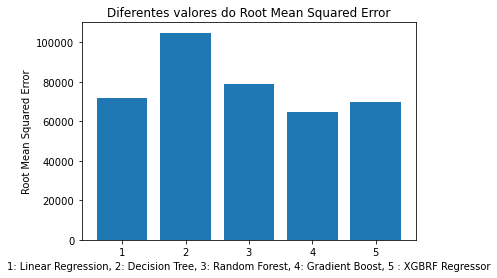

In [201]:
rmse = [rmse_lr, rmse_dt,rmse_rf,rmse_gb,rmse_xg]

# Plot bar chart with data points
plt.bar([1,2,3,4,5], height = rmse)

# Display the plot
plt.title('Diferentes valores do Root Mean Squared Error')
plt.xlabel('1: Linear Regression, 2: Decision Tree, 3: Random Forest, 4: Gradient Boost, 5 : XGBRF Regressor')
plt.ylabel('Root Mean Squared Error')
plt.show()

# <font color='red' style='font-size: 30px;'>Cross-Validation</font>
<hr style='border: 2px solid red;'>

In [202]:
#CrossVal Linear Regression
lr_scores = cross_val_score(
    lr,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

lr_rmse_scores = np.sqrt(-lr_scores)

In [203]:
#CrossVal Decision Trees
dt_scores = cross_val_score(
    dt,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

dt_rmse_scores = np.sqrt(-dt_scores)

In [204]:
#CrossVal Random Forest
rf_scores = cross_val_score(
    rf,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

rf_rmse_scores = np.sqrt(-rf_scores)

In [205]:
#CrossVal Gradient Boosting
gb_scores = cross_val_score(
    gb,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

gb_rmse_scores = np.sqrt(-gb_scores)

In [206]:
#CrossVal XG Boost
xg_scores = cross_val_score(
    xg,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

xg_rmse_scores = np.sqrt(-xg_scores)

<AxesSubplot:ylabel='RMSE $[\\mathtt{USD}]$'>

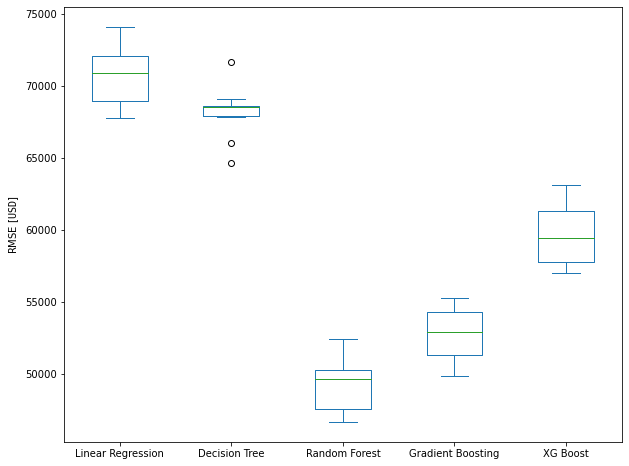

In [207]:
pd.DataFrame({
    'Linear Regression': lr_rmse_scores,
    'Decision Tree': dt_rmse_scores,
    'Random Forest': rf_rmse_scores,
    'Gradient Boosting': gb_rmse_scores,
    'XG Boost': xg_rmse_scores,
}).plot.box(
    xlabel='Regressor',
    ylabel=r'RMSE $[\mathtt{USD}]$',
    figsize=(10, 8),
)

In [208]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=2))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [209]:
display_scores(rf_rmse_scores)

Scores: [46878.13 51266.88 49250.29 50070.42 52416.38 46640.05 47227.76 50298.1
 48417.57 49993.5 ]
Mean: 49245.90824804362
Standard deviation: 1834.0663826065486


# <font color='red' style='font-size: 30px;'>Serializar modelos</font>
<hr style='border: 2px solid red;'>

Como o modelo vencedor foi o Random Forest, vamos guardar o seu resultado.

In [210]:
joblib.dump(rf,
           'modelo_vencedor_regressor.pkl',
           compress=1)

['modelo_vencedor_regressor.pkl']

In [211]:
result = rf.predict(X_test_prepared)

In [212]:
result = pd.DataFrame(result, columns=['resultadoModelo'])
result

,resultadoModelo
0,77321.00
1,129262.00
2,373941.22
3,271518.00
4,423247.23
...,...
4123,228641.01
4124,288161.11
4125,412091.74
4126,132692.00


# <font color='red' style='font-size: 30px;'>Otimizar o melhor modelo</font>
<hr style='border: 2px solid red;'>

Agora, vendo o resultado dos nossos modelos, vamos selecionar, através de recursos da biblioteca do sklearn, quais são os melhores features para o nosso modelo?

## F-Regression
Vai dar uma resposta de quais são os features que mais estão impactando no resultado da target, ou seja, a correlação.

In [216]:
f_reg = SelectKBest(f_regression, k=4)
f_reg

SelectKBest(k=4, score_func=<function f_regression at 0x7fd23d8138b0>)

In [219]:
f_reg.fit(X_train_prepared, y_train)

SelectKBest(k=4, score_func=<function f_regression at 0x7fd23d8138b0>)

In [225]:
f_reg_support = f_reg.get_support()
#f_feature = X_train_prepared.loc[:, f_reg_support].columns.tolist()
len(X_train_prepared)

16512

## Mutual Information
Já esse método diz quais variáveis traz um maior impacto na troca de informações com o target, ou seja, qual feature provoca uma maior variação de entropia após a predição. Além disso, esse método analisa relacoes linear, polinomiais e exponenciais, diferente do F-Regression, que somente vê as relações lineares. 

In [68]:
mi_reg = SelectKBest(mutual_info_regression, k=4)

In [72]:
mi_reg.fit(X_train_prepared, y_train)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7fd23d82a310>)

In [74]:
mi_reg_support = mi_reg.get_support()
mi_feature = X_train_prepared.loc[:, mi_reg_support].columns.tolist()
mi_feature

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

## Tuning de Hiperparâmetros


Os parâmetros são os componentes do modelo que são aprendidos durante o processo de treinamento e nunca podemos defini-los manualmente. Um modelo inicia o processo de treinamento com valores de parâmetros aleatórios e os ajusta por toda parte. Já os hiperparâmetros são os componentes definidos por você antes do treinamento do modelo. Os valores dos hiperparâmetros podem melhorar ou piorar a precisão do seu modelo.

### Grid Search

O Grid Search é uma das formas de fazer o tuning de hiperparâmetros, ele é fácil de implementar para encontrar o melhor modelo dentro da grade. No entanto, é computacionalmente caro, pois o número do modelo continua a se multiplicar quando adicionamos novos valores de hiperparâmetros.

In [76]:
modelo = rf

In [77]:

grid_dict = {
    'n_estimators':[2,5,10,50,100,200,500],
    'random_state':[42],
    'max_depth':[2,6,10,20,50,100]
}

In [78]:
grid = GridSearchCV(modelo, grid_dict, cv=2)


In [79]:
grid.fit(X_train_prepared, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 6, 10, 20, 50, 100],
                         'n_estimators': [2, 5, 10, 50, 100, 200, 500],
                         'random_state': [42]})

In [84]:
grid.best_score_

0.804064679149649

In [85]:
grid.best_params_

{'max_depth': 50, 'n_estimators': 500, 'random_state': 42}

### Random Search

O Random Search é outra maneira. A sua diferença pro Grid, é que ele seleciona os hiperaparâmetros, e os testa, de forma aleatória.

In [80]:
grid_rand = RandomizedSearchCV(modelo, grid_dict, cv=2, n_iter=5)

In [81]:
grid_rand.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [2, 6, 10, 20, 50, 100],
                                        'n_estimators': [2, 5, 10, 50, 100, 200,
                                                         500],
                                        'random_state': [42]})

In [82]:
grid_rand.best_score_

0.8032734430932715

In [83]:
grid_rand.best_params_

{'random_state': 42, 'n_estimators': 200, 'max_depth': 20}

Vamos calcular agora o R2 para a base de validação

In [86]:
result_y = grid_rand.predict(X_test_prepared)

In [91]:
result_y = pd.DataFrame(result_y, columns=['resultadoModelo'])
result_y

,resultadoModelo
0,50126.753448
1,75450.978673
2,362816.095000
3,252155.455308
4,265012.793508
...,...
4123,206053.232897
4124,237089.011325
4125,498435.480000
4126,84254.201879


In [88]:
r2_score(y_test, result_y)

0.7180976054549784

In [90]:
((r2_score(y_test, result_y)) - (r2_score(y_test, rf.predict(X_test_prepared))))/r2_score(y_test, rf.predict(X_test_prepared))*100

0.3746889482302987

# <font color='red' style='font-size: 30px;'>Conclusão</font>
<hr style='border: 2px solid red;'>